# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Programação para Ciência de Dados</span>

## <span style="color:blue">Numpy Parte II e Matplotlib</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

## Numpy - Parte II
- *"Broadcasting"* (extensão) e funções aritméticas
- Comparações
- Operações Avançadas: Reduções, Ordenação, Aritmética vetorial,...

__References:__<br>
[https://www.datacamp.com/community/tutorials/python-numpy-tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

### Matplotlib
- Introdução
- Componentes
- Texto
- Anotações
- Legendas
- Outros plots

__Referencias:__<br>
[https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)<br>
[http://matplotlib.org/Matplotlib.pdf](http://matplotlib.org/Matplotlib.pdf)

---
## Numpy - Parte II

### Broadcasting
Para garantir eficiência computacional na realização de operações entre arrays o <font color='blue'>numpy</font> utiliza um mecanismo de extensão de arrays chamado "broadcasting". Com o uso de broadcasting:
- as operações aritméticas com arrays (soma, subtração, multiplicação e divisão) são feitas elemento a elemento (*"element-wise"*)
- o __broadcasting__ transforma os arrays envolvidos nas operações aritméticas de modo que tenham as mesmas dimensões, possibilitando assim que as operações possam ser realizada elemento a elemento

#### Broadcasting e operações entre um array e um escalar

Quando somamos um escalar a um array, o <font color='blue'>numpy</font> primeiro replica o escalar em um array com o mesma dimensão do array envolvido na operação. No examplo baixo, a matriz `A` é somada com o escalar 3. O __broadcasting__ replica o escalar um array 5x5 e então os dois arrays são somados elemento a elemento.
```python
A = np.arange(25).reshape(5,5) # matriz 5x5
s = 3                          # escalar
B = s+A                        # matriz 5x5
```
$$
B = s + A = \left[\begin{array}{ccccc}
3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3\\
3 & 3 & 3 & 3 & 3
\end{array}\right] + 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

In [2]:
import numpy as np

# Cria uma matriz 5x5 com números aleatórios
A = np.arange(25).reshape(5,5)

# define um escalar
s = 3

# O opeador "+" é aplicado elemento por elemento (caso contrário não seria definido)
B = s + A

print(A,'\n')
print(B)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]


#### Broadcasting e operações entre arrays
Broadcasting tambem é aplicado quando operações aritméticas são aplicadas em pares de arrays, porém algumas restrições devem ser respeitadas:
- Os dois arrays devem possuir dimensões compatíveis em algum(s) dos eixos
- O broadcasting é aplicado nos demais eixos para que ambos os arrays tenham as mesmas dimensões
```python
A = np.arange(25).reshape(5,5) # matriz 5x5
v = np.arange(5)               # array com 5 elementos
B = v*A                        # matriz 5x5
```
$$
B = v * A 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

__Cuidado__: A operação <font color='blue'>*</font> corresponde a uma multiplicação elemento por elemento, e não uma multiplicação matricial.

In [4]:
A = np.arange(25).reshape(5,5) # matriz 5x5
print('Matriz "A" possui ', A.shape[0], ' linhas e ',A.shape[1],' colunas')


v = np.arange(5)  # array com 5 elementos
                  # como a segunda dimensão não foi especificada, "v" é interpretado 
                  # como um sendo 1x5 (uma linha e 5 colunas)
        
print('Array "v" possui ', v.shape[0], ' elementos ')
print('Note que a segunda dimensão de "v" não é especificada ',v.shape)

# A operação "*" é realizada elemento a elemento, broadcasting o array "v" para gerar novas linhas
B = v * A

print(5*'---')
print('v = \n',v)
print('A = \n',A)
print('B = \n',B)

Matriz "A" possui  5  linhas e  5  colunas
Array "v" possui  5  elementos 
Note que a segunda dimensão de "v" não é especificada  (5,)
---------------
v = 
 [0 1 2 3 4]
A = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
B = 
 [[ 0  1  4  9 16]
 [ 0  6 14 24 36]
 [ 0 11 24 39 56]
 [ 0 16 34 54 76]
 [ 0 21 44 69 96]]


O __broadcasting__ é feito nas colunas quando o array `v` é um array coluna
```python
v = np.arange(5).reshape(5,1) # array com 5 elementos 
                              # como a segunda dimensão foi especificada, "v" é um array 
                              # com 5 linhas e uma coluna
```
$$
B = v * A 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{c}
0  \\ 1 \\ 2 \\ 3 \\ 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 0 & 0 & 0 & 0\\
1  & 1 & 1 & 1 & 1\\
2  & 2 & 2 & 2 & 2\\
3  & 3 & 3 & 3 & 3\\
4  & 4 & 4 & 4 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

In [6]:
A = np.arange(25).reshape(5,5) # matriz 5x5
print(A.shape)

v = np.arange(5).reshape(5,1) # array com 5 elementos 
                              # como a segunda dimensão foi especificada, "v" é um array com 5 linhas e uma coluna
print(v.shape)

# A operação "*" é feita elemento por elemento, broadcasting "v" para gerar novas colunas
# Agora "v" é um vetor coluna
B =  v * A

print(v,'\n')
print(A,'\n')
print(B)

(5, 5)
(5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]] 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  0  0  0  0]
 [ 5  6  7  8  9]
 [20 22 24 26 28]
 [45 48 51 54 57]
 [80 84 88 92 96]]


Broadcasting também é realizado quando os dois operandos são arrays unidimensionais, sendo um deles array linha e o outro array coluna. Neste caso, __Broadcasting__ é aplicado em ambos:
```python
v = np.arange(5)  # array com 5 elementos
                  # como a segunda dimensão não foi especificada, "v" é interpretado 
                  # como um sendo 1x5 (uma linha e 5 colunas)

w = np.arange(3).reshape(3,1) # array com 3 elementos 
                              # como a segunda dimensão foi especificada,  
                              # "v" é um array com 3 linhas e uma coluna
```
$$
Z = v + w
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4
\end{array}\right] + 
\left[\begin{array}{c} 
0  \\
1 \\
2
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4
\end{array}\right] + 
\left[\begin{array}{ccccc} 
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1\\
2 & 2 & 2 & 2 & 2
\end{array}\right]
$$

In [8]:
v = np.arange(5)  # array com 5 elementos
                  # como a segunda dimensão não foi especificada, "v" é interpretado 
                  # como um sendo 1x5 (uma linha e 5 colunas)
print(v.shape)

w = np.arange(3).reshape(3,1) # array com 3 elementos 
                              # como a segunda dimensão foi especificada, "v" é um array 
                              # com 3 linhas e uma coluna
print(w.shape)

# A operação "+" é feita elemento por elemento, broadcasting "v" e "w" simultaneamente
# Neste caso "w" é um vetor coluna e "v" é tratado como vetor linha
Z =  v + w

print('array v:\n',v,'\n')
print('array w:\n',w,'\n')
print('array Z = v+w\n',Z)  
print(Z.shape) # note que o resultado é uma matriz 3x5

(5,)
(3, 1)
array v:
 [0 1 2 3 4] 

array w:
 [[0]
 [1]
 [2]] 

array Z = v+w
 [[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]
(3, 5)


Broadcasting também é usado em atribuiçoes

In [10]:
A = np.zeros((5,3)) # matriz 5x3 de zeros

A[:3] = [-1,-2,-3] # a lista [-1,-2,-3] é estendida para uma matriz 3x3, criando novas linhas 
                   # note que apenas parte da matriz 'A' é alterada
print(A)

[[-1. -2. -3.]
 [-1. -2. -3.]
 [-1. -2. -3.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


Pode-se forçar que o Broadcasting em um dos eixos

In [12]:
A = np.zeros((5,3)) # matriz 5x3 de zeros
v = np.arange(5)    # array com 5 elementos, segunda dimensão não foi especificada

# o comando np.newaxis transform v em um vetor coluna, 
# realizando o broadcasting em v nas colunas
A[:] = v[:,np.newaxis]
print(A)

# o comando acima é equivalente a
A[:] = v.reshape(5,1)
print(A)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]


### Comparações
Comparações usando `==`, `>`,`<`,`>=`,`<=`, e `!=` também são feitas elemento por elemento.

In [14]:
A = np.arange(4).reshape(2,2)      # matriz 2x2
B = np.arange(6,2,-1).reshape(2,2) # matriz 2x2

M = (B == A)

print(A,'\n')
print(B,'\n')
print(M)

[[0 1]
 [2 3]] 

[[6 5]
 [4 3]] 

[[False False]
 [False  True]]


Para verificar se dois arrays são iguais (todos elementos são iguais) deve-se utilizar o método <font color='blue'>array_equal</font>.

In [16]:
A = np.arange(4).reshape(2,2)      # matrix 2x2
B = np.arange(6,2,-1).reshape(2,2) # matrix 2x2
C = np.copy(A)

# A resposta é apenas um valor booleano
print(np.array_equal(A,B))
print(np.array_equal(A,C))

# np.array_equal(A,B) é equivalente a:
D = (A==B)
print(np.all(D))

False
True
False


### Reduções
O <font color='blue'>numpy</font> possui métodos de redução como  <font color='blue'>sum</font>, <font color='blue'>max</font>, <font color='blue'>min</font>, <font color='blue'>argmax</font> e <font color='blue'>argmin</font>. Tais métodos podem ser aplicados ao array como um todo ou somente às linhas ou colunas.
O que controla a forma de aplicação é o parâmetro 'axis'. Quando o parâmetro 'axis' não é especificado, a redução é aplicada ao array todo. 
- 'axis' não especificado: retorna um valor único
- 'axis=0' restringe a redução às colunas (percorre as linhas): retorna um array com número de elementos igual ao número de colunas
- 'axis=1' restringe a redução às linhas (percorre as colunas): retorna um array com número de elementos igual ao número de linhas

In [18]:
A = np.zeros((5,5))  # matriz 5x5 de zeros
A[:] = np.arange(5)  # broadcasting o array [0,1,2,3,4] nas linhas

print(A,'\n')

print('Soma de todos os valores: ', np.sum(A)) # todos os elementos
print('Soma dos valores das colunas: ', np.sum(A,axis=0)) # soma os valores das colunas
print('Soma dos valores das linnhas: ', np.sum(A,axis=1)) # soma os valores das linhas

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]] 

Soma de todos os valores:  50.0
Soma dos valores das colunas:  [ 0.  5. 10. 15. 20.]
Soma dos valores das linnhas:  [10. 10. 10. 10. 10.]


In [20]:
A = np.random.randint(low=0,high=30,size=(5,5)) # matriz 5x5 com números inteiros 
                                                # randomicos no intervalor entre 0 e 30
print(A,'\n')

# todos os elementos
print('Maior valor dentre todos na matriz: ',np.max(A))    # maior valor da matriz
print('Posição do maior valor dentre todos na matriz: ',np.argmax(A)) # lineariza a matriz com A.ravel() e 
                                                                      # retorna a posicão do maior valor

# Por coluna
print('Maior valor em cada coluna: ',np.max(A,axis=0))  # maior valor em cada coluna
print('Posição do maior valor em cada coluna: ',np.argmax(A,axis=0)) # posição do maior valor em cada coluna

[[13 22 20 27 22]
 [ 0 16  0 29 16]
 [23 16 26 12 17]
 [ 6 11 15 15  6]
 [ 6 24 17 17 25]] 

Maior valor dentre todos na matriz:  29
Posição do maior valor dentre todos na matriz:  8
Maior valor em cada coluna:  [23 24 26 29 25]
Posição do maior valor em cada coluna:  [2 4 2 1 4]


Reduções estatísticas como:
- <font color='blue'>mean</font>: média aritmética
- <font color='blue'>median</font>: mediana 
- <font color='blue'>std</font>: desvio padrão

funcionam da mesma forma, ou seja, podem ser aplicados ao array como um todo ou somente às linhas e colunas utilizando o parâmetro 'axis'.

In [22]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

print('Media de todos os valores: ',np.mean(A))   # média de todos os valores
print('Media por coluna: ',np.mean(A,axis=0))     # média por coluna
print('Media por linha: ',np.mean(A,axis=1))      # média por linha

[[ 7.  0.  9. 28. 24.]
 [28.  7.  5. 28.  6.]
 [ 8. 20. 12. 15. 15.]
 [19. 27. 27. 17. 10.]
 [27.  4. 11. 21. 12.]] 

Media de todos os valores:  15.48
Media por coluna:  [17.8 11.6 12.8 21.8 13.4]
Media por linha:  [13.6 14.8 14.  20.  15. ]


#### Redução lógica
O métodos 
- <font color='blue'>all</font>: verifica se todos os elementos do array satisfazem a condição (True)
- <font color='blue'>any</font>: verifica se algum elemento do array satisfaz a condição (True)

também podem ser aplicados ao array como um todo ou somente às linhas e colunas utilizando o parâmetro 'axis'.

In [24]:
A = np.arange(25).reshape(5,5)
print(A,'\n')

M = A > 0
print(M,'\n')

print('Todos os elementos são TRUE? ', np.all(M))
print('Algum elemento é TRUE? ',np.any(M))

print('Todos os elementos de cada coluna são TRUE? ',np.all(M,axis=0))
print('Algum elemento de cada linha é TRUE? ',np.any(M,axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]] 

Todos os elementos são TRUE?  False
Algum elemento é TRUE?  True
Todos os elementos de cada coluna são TRUE?  [False  True  True  True  True]
Algum elemento de cada linha é TRUE?  [ True  True  True  True  True]


### Ordenação 
#### <font color='blue'>sort</font>
O método <font color='blue'>sort</font> do <font color='blue'>numpy</font> ordena os elementos do array. 
- Quando o método <font color='blue'>sort</font> é invocado utilizando a própria variável, a ordenação é feita diretamente no array (inplace). Por exemplo:
```python
A = np.random.randint(low=0,high=30,size=(5,5))
A.sort()  # modifica o array original
```
- Quando o método <font color='blue'>sort</font> é invocado pelo <font color='blue'>numpy</font> uma cópia ordenada do array é gerada (o array original não é modificado).
```python
A = np.random.randint(low=0,high=30,size=(5,5))
B = np.sort(A)  # `B` é uma cópia de `A` com linhas ordenas (`A` não é afetado)
```

Por padrão a ordenação é feita em cada linha (`axis=1` é o valor padrão do parâmetro 'axis' no comando <font color='blue'>sort</font>) 

In [26]:
A = np.random.randint(low=0,high=30,size=(5,5))
print('Array original "A": \n',A,'\n')

B = np.sort(A) # `B` é uma cópia de `A` com linhas ordenas
print('"B" é cópia de "A" com valores das linhas ordenados. Array "A" não é alterado:')
print('B = \n',B,'\n')
print('A = \n',A,'\n')

Array original "A": 
 [[10 16 21  4 27]
 [ 8 12 17 10 29]
 [19 19 12 18 25]
 [23 14  8 17 18]
 [24 27 18 16 17]] 

"B" é cópia de "A" com valores das linhas ordenados. Array "A" não é alterado:
B = 
 [[ 4 10 16 21 27]
 [ 8 10 12 17 29]
 [12 18 19 19 25]
 [ 8 14 17 18 23]
 [16 17 18 24 27]] 

A = 
 [[10 16 21  4 27]
 [ 8 12 17 10 29]
 [19 19 12 18 25]
 [23 14  8 17 18]
 [24 27 18 16 17]] 



In [28]:
A.sort()  # as linhas de `A` são ordenadas modificando o array original
print('Os valores das linhas do array "A" são ordenados: \n A =\n',A,'\n')

A.sort(axis=0) # as COLUNAS de `A` são ordenadas modificando o array original
print('Os valores das colunas são ordenadas:  \n A =\n',A,'\n')

Os valores das linhas do array "A" são ordenados: 
 A =
 [[ 4 10 12 17 23]
 [ 8 10 16 18 25]
 [ 8 14 17 19 27]
 [12 17 18 21 27]
 [16 18 19 24 29]] 

Os valores das colunas são ordenadas:  
 A =
 [[ 4 10 12 17 23]
 [ 8 10 16 18 25]
 [ 8 14 17 19 27]
 [12 17 18 21 27]
 [16 18 19 24 29]] 



#### <font color='blue'>argsort</font>
O método <font color='blue'>argsort</font> retorna um array contendo os índicies dos elementos ordenados nas linhas. O parâmetro 'axis=0' pode ser utilizado para que a ordenação seja aplicada às colunas.   

In [30]:
A = np.array([[12.0,  1.0, 26.0],
              [23.0,  0.0,  7.0],
              [10.0,  19.0, 21.0]])
print(A,'\n')

I = np.argsort(A)  # fornece os indices dos elementos ordenados em cada linha
print(I,'\n')
N = np.copy(A)
for i in range(A.shape[0]):
    print('Indices dos elementos ordenados na linha ',i,': ',I[i])
    print('Linha',i,': '+10*' ',A[i])
    print('Linha ',i,' ordenada: ',A[i,I[i]],'\n')
    N[i] = A[i, I[i]]
N2 = [np.array(A[i, I[i]]) for i in range(A.shape[0])]
print("This is Re-ordered N=\n", N)
print("This is Re-ordered using List comprehension N2=\n", N2)

[[12.  1. 26.]
 [23.  0.  7.]
 [10. 19. 21.]] 

[[1 0 2]
 [1 2 0]
 [0 1 2]] 

Indices dos elementos ordenados na linha  0 :  [1 0 2]
Linha 0 :            [12.  1. 26.]
Linha  0  ordenada:  [ 1. 12. 26.] 

Indices dos elementos ordenados na linha  1 :  [1 2 0]
Linha 1 :            [23.  0.  7.]
Linha  1  ordenada:  [ 0.  7. 23.] 

Indices dos elementos ordenados na linha  2 :  [0 1 2]
Linha 2 :            [10. 19. 21.]
Linha  2  ordenada:  [10. 19. 21.] 

This is Re-ordered N=
 [[ 1. 12. 26.]
 [ 0.  7. 23.]
 [10. 19. 21.]]
This is Re-ordered using List comprehension N2=
 [array([ 1., 12., 26.]), array([ 0.,  7., 23.]), array([10., 19., 21.])]


### Aritmétrica vetorial e matricial
A multiplicação matriz e vetor (ou matriz e matriz) como definida na álgebra matricial é feita utilizando o método <font color='blue'>dot</font>.

__Atenção:__ As dimensões devem ser compatíveis

$$
b1 = \left[\begin{array}{cc}
           1 & 1 \\
           2 & 2
    \end{array}\right]\cdot
    \left[\begin{array}{c}
           1  \\
           2 
    \end{array}\right] = \left[\begin{array}{c}
           3  \\
           6 
    \end{array}\right]
$$

$$
b2 = \left[\begin{array}{cc}
           1 & 2 
    \end{array}\right]\cdot
\left[\begin{array}{cc}
           1 & 1 \\
           2 & 2
    \end{array}\right]\cdot
     = \left[\begin{array}{cc}
           5 & 5
    \end{array}\right]
$$

In [32]:
A = np.zeros((2,2))      # matrix 2x2 de zeros  
v = np.array([1,2]).reshape(2,1) # array 2x1
A[:] = v                # broadcasting o array 2x1 nas colunas da matriz 'A'

print('Matriz 2x2 A:\n',A)
print('Vetor 2x1 v:\n',v)

print('\n Multiplicando a matriz A pelo vetor v resulta em um vetor 2x1')
b1 = np.dot(A,v)   # v e b1 são vetores colunas 
print(b1,b1.shape)

#### Atenção ####
# O produto np.dot(v,A) não é válido, pois as dimensões não são compatíveis 
# (produto de vetor 2x1 com matriz 2x2 não existe tente gerar o produto e veja a mensagem de erro)

# Para compadibilizarmos as dimensão precisamos transpor o vetor v
# (produto de vetor 1x2 com matriz 2x2 é bem definido e resulta em um vetor 1x2
print('\n Multiplicando o vetor transposto v.T pela matriz A pelo resulta em um vetor 1x2')
b2 = np.dot(v.T,A) # v.T é um vetor linha, assim como b2
print(b2,b2.shape)

Matriz 2x2 A:
 [[1. 1.]
 [2. 2.]]
Vetor 2x1 v:
 [[1]
 [2]]

 Multiplicando a matriz A pelo vetor v resulta em um vetor 2x1
[[3.]
 [6.]] (2, 1)

 Multiplicando o vetor transposto v.T pela matriz A pelo resulta em um vetor 1x2
[[5. 5.]] (1, 2)


## Muito mais...
- `numpy.linalg` biblioteca de algebra linear
   - resolução de sistema
   - decomposição em eigen vetores
- numpy.polynomial
   - aritmétrica polynomial
   - estimativa polynomial 
   - interpolação polynomial
- numpy.fft
   - transformação de Fourier 
- ...


---
## Matplotlib
###  Introdução
O <font color='blue'>matplotlib</font> é um pacote do python destinado a geração de gráficos. O <font color='blue'>matplotlib</font> possui vários submódulos, sendo o <font color='blue'>pyplot</font> um dos mais utilizados para construção de gráficos. A forma mais comum de importar o <font color='blue'>pyplot</font> é:
```python
import matplotlib.pyplot as plt  
```
O <font color='blue'>matplotlib</font> utiliza o <font color='blue'>numpy</font> como base, garantindo um bom desempenho computacional. Assim, os parâmetros empregados nos métodos do <font color='blue'>matplotlib</font> são arrays do <font color='blue'>numpy</font>. Se outros tipos, como listas e tuplas, forem enviadas como parâmetro, o  <font color='blue'>matplotlib</font> as converte internamente para arrays.


Um tutorial sobre os métodos do <font color='blue'>pyplot</font> pode ser encontrado em  [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html)

### Plot
O método <font color='blue'>plot</font> gera gráficos a partir de dois arrays de valores, um correspondendo às coordenadas no eixo horizontal e outro às coordenadas no eixo vertical.
- supõe que os arrays enviados como parâmetros correspondem a valores discretos para os eixos horizontal e vertical
    - se apenas um array é fornecido, o método automaticamente supõe valores inteiros igualmente espaçados no eixo horizontal
- como todos os métodos do <font color='blue'>pyplot</font>, o método <font color='blue'>plot</font> admite um número grande de parâmetros que permitem personalizar o gráfico

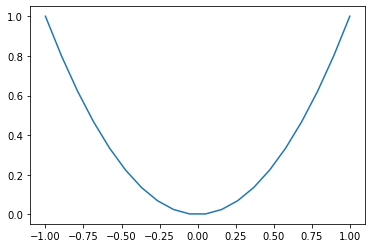

In [34]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
         # o comando "%matplotlib inline" faz com que os gráficos fiquem "embutidos" no notebook, sem ele uma nova
         # janela é criada para cada gráfico.

x = np.linspace(-1,1,20) # array com 20 pontos igualmente espaçados no intervalo 0 e 1
y = x**2                # valores elevados ao quadrado
plt.plot(x,y)           # gera o gráfico dos valores (x,x**2)

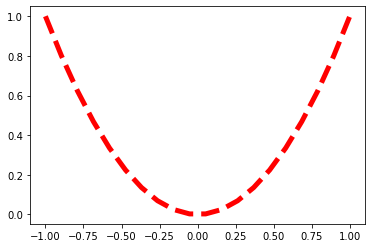

In [36]:
# parâmetros podem ser fornecidos para controlar a cor (color), expessura (linewidth) e 
# estilo da linha (linestyle) no gráfico
plt.plot(x,y,color='red',linewidth = 5, linestyle = '--')

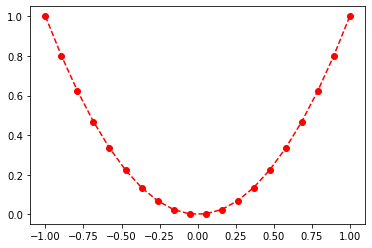

In [38]:
# pode-se incluir marcadores (marker) para identificar os pares de valores fornecidos
plt.plot(x,y,color='red', linestyle = '--',marker='o')

[None, None, None]

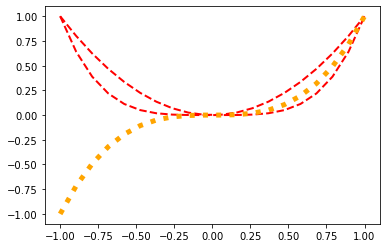

In [40]:
# Pode-se incluir diversos gráficos
line_2_3 = plt.plot(x,y,x,x**4) # gera dois gráficos simultaneamente
                                # um com os valores (x,y) e outro com (x,x**3)
                                # armazenando o resultado em uma variável
        
plt.setp(line_2_3,color='red',linewidth = 2, linestyle = '--') # o comando "setp" especifica o estilo para todos
                                                               # os gráficos referenciados pela variável criada

line_4 = plt.plot(x,x**3)     # mais um gráfico é gerado
plt.setp(line_4,color='orange',linewidth = 5, linestyle = ':') # com estilo diferente dos dois anteriores

### Subplots
O método <font color='blue'>subplot</font> possibilita organizar diversos gráficos em uma matriz de gráficos.
Os parâmetros do método <font color='blue'>subplot</font> são:
- 'num_rows': número de linhas na matriz de gráficos
- 'num_cols': número de colunas na matriz de gráficos
- 'subplot_number': índice do subplot na matriz linearizada

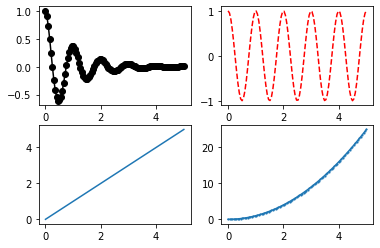

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def f(t):
    return(np.exp(-t) * np.cos(2.0*np.pi*t))

t2 = np.linspace(0.0, 5.0, 100)

plt.subplot(2, 2, 1)  # gera uma matriz 2x2 onde os gráficos serão exibidos e 
                      # ativa o elemento 1 (elemento superior esquerdo da matriz)
                      # para que o gráfico seja gerado nele
plt.plot(t2, f(t2), color='black', marker = 'o')

plt.subplot(2, 2, 2)  # ativa o elemento 2 (elemento superior direito da matriz)
                      # para que o gráfico seja gerado nele
plt.plot(t2, np.cos(2.0*np.pi*t2), color='red', linestyle = '--')

plt.subplot(2, 2, 3)  # ativa o elemento 3 (elemento inferior esquerdo da matriz)
                      # para que o gráfico seja gerado nele
plt.plot(t2, t2)

plt.subplot(2, 2, 4)  # ativa o elemento 4 (elemento inferior direito da matriz)
                      # para que o gráfico seja gerado nele
plt.plot(t2, t2**2,marker='s',markersize=1)

### Texto
O método <font color='blue'>text</font> permite adicionar texto a um gráfico
- Texto pode ser adicionado em qualquer local da figura
- Características podem ser customizadas através dos parâmetros ou utilizando o método <font color='blue'>setp</font>
- Os seguintes métodos são úteis para incluir e organizar textos em um gráfico:
    - text() - adiciona texto  em uma localização expecífica
    - xlabel() - adiciona um rótulo ao eixo horizontal
    - ylabel() - adiciona um rótulo ao eixo vertical
    - title() - adiciona um título ao gráfico
    - annotate() - adiciona uma anotação (com uma seta opcional) 
- Várias [outras propriedades](https://matplotlib.org/api/text_api.html)

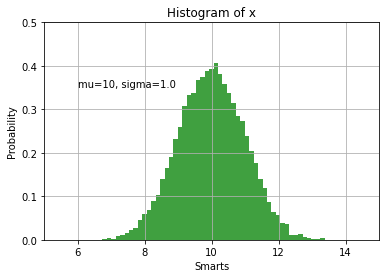

In [44]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 10.0, 1.0
x = np.random.normal(mu,sigma,size=10000) # gera 10 mil números a partir de uma distribuição Gaussiana

# gera um histograma de x
plt.hist(x,50,density=1,facecolor='g',alpha=0.75) # o método"hist" gera um gráfico de histograma
plt.xlabel('Smarts')         # rótulo do eixo horizontal
plt.ylabel('Probability')    # rótulo do eixo vertical
plt.title('Histogram of x')  # título da figura

# posiciona o texto na posição (6.0, 0.35)
plt.text(6.0, 0.35, 'mu=10, sigma=1.0')
# define o intervalo de valores apresentados no eixo horizontal e vertical
plt.axis([5, 15, 0, 0.5])

# coloca uma grade no fundo da figura
plt.grid(True)

Text(3, 1.3, 'max local')

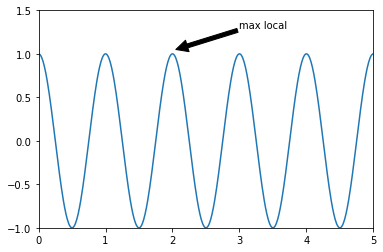

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

plt.plot(t, s)   # gera o plot da funcao 
plt.axis([0.0, 5.0, -1.0, 1.5])  # define o intervalo de valores apresentados no eixo horizontal e vertical

plt.annotate('max local', xy=(2.05,1.05), xytext=(3,1.3), # gera uma anotação
             arrowprops=dict(facecolor='black'))

### Legenda
Legendas podem ser geradas de forma bastante simples com o métodos <font color='blue'>legend</font>

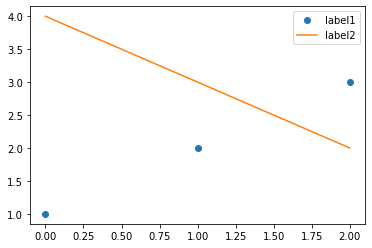

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot([1,2,3],'o', label="label1")
plt.plot([4,3,2], label="label2")

plt.legend()

__Outros plots úteis:__
- bar()
- scatter()
- stackplot()
- matshow()

[Mais informações](https://realpython.com/python-matplotlib-guide/)